In [67]:
# Set up reload situation
%load_ext autoreload
%autoreload 2

from pathlib import Path

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

import random
import pandas as pd
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import colorsys

import utils

In [60]:
root = Path("..")

# Generate name patterns

In [164]:
syllabus_path = root / "syllabus.xlsx"

syllabus = pd.read_excel(syllabus_path)
faculty_names = syllabus['Lecturer'].values
faculty_names = [n for n in faculty_names if (type(n) is str) and (n != 'TAs')]
faculty_names = list(np.unique(faculty_names))

faculty_names.pop(1)
faculty_names.append('Andre Fenton')

In [165]:
TA_names = ["Jeff Johnston", "Erfan Zabeh", "Chiara Mastrogiuseppe", "Shuqi Wang", "Yue Kris Wu", "Alan Lai"]

In [166]:
Student_names = [\
"Beau, Maxime",
"Bigus, Erin Rose",
"Blair, Garrett James",
"Buck, Friederike",
"Chen, Kevin S",
"Elnozahy, Sarah E",
"Grier, Harrison",
"Jing, Zeyu",
"Kajikawa, Koichiro",
"Landau, Andrew",
"Majumder, Shouvik",
"Maoutsa, Dimitra Despoina",
"Mirbagheri, Saghar",
"Natrajan, Maanasa",
"Nie, Chechang",
"Osman, Mo",
"Park, JeongJun",
"Sakelaris, Bennet",
"Shi, Yuelin",
"Singer-Clark, Tyler",
"Teasley, Audrey",
"Thurston, Mackenzie J",
"Tian, Gengshuo",
"Tiberi, Lorenzo",
"Wilkins, Lillian Tuck",
    ]
Student_names = [' '.join(n.split(', ')[::-1]) for n in Student_names]

/var/folders/7d/qc682nsj13d_bz11bztzd5hm0000gn/T/ipykernel_47526/596786586.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


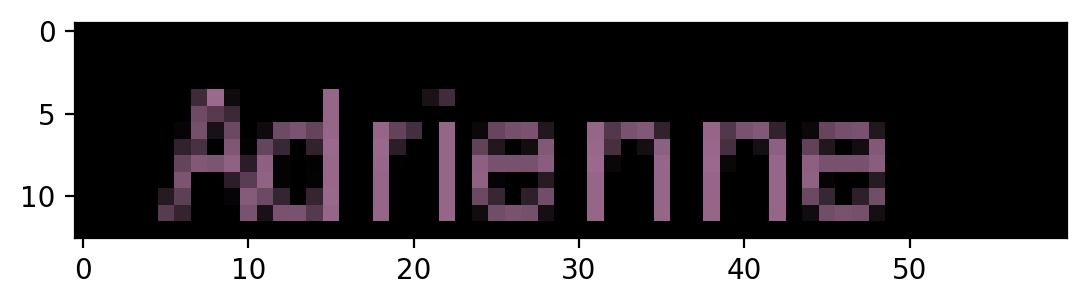

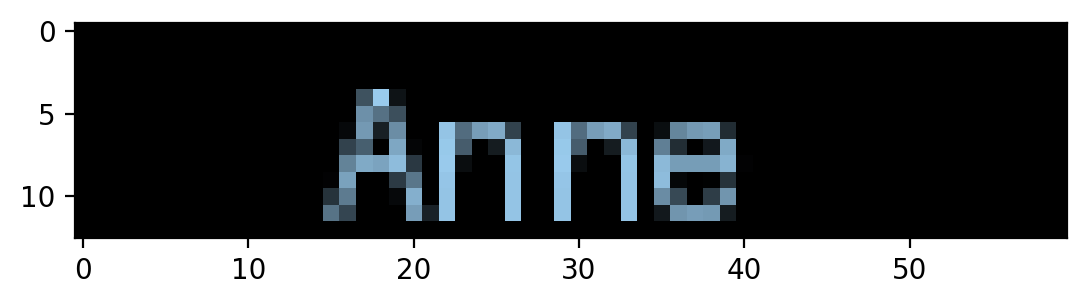

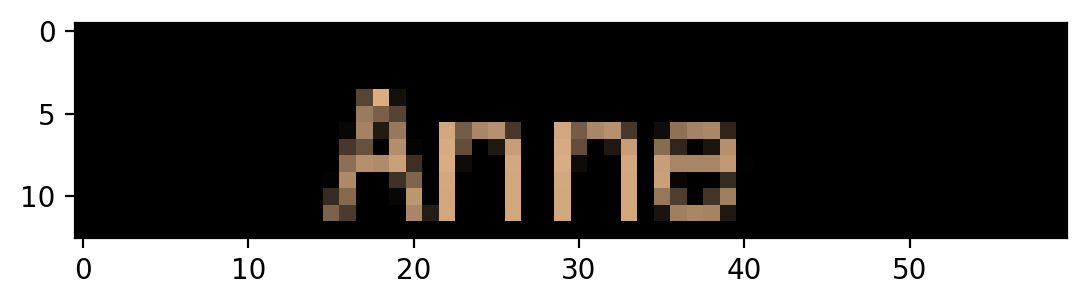

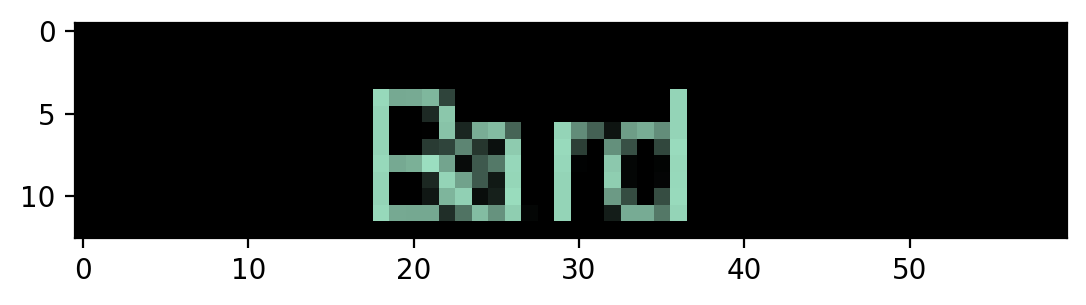

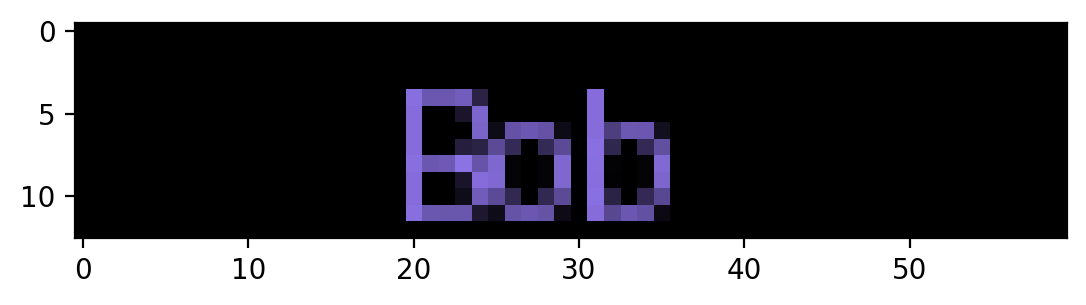

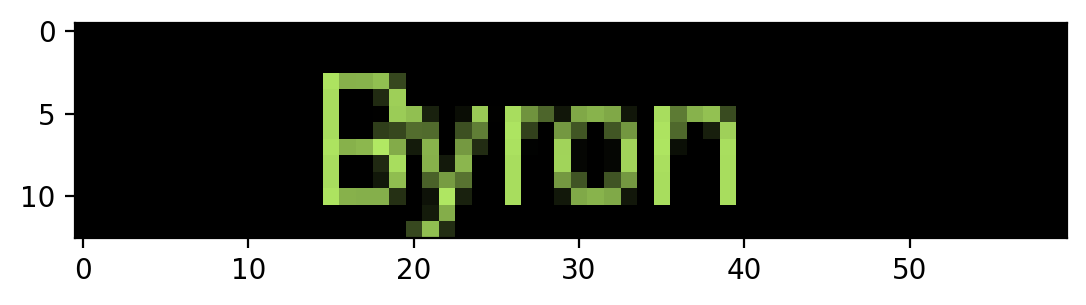

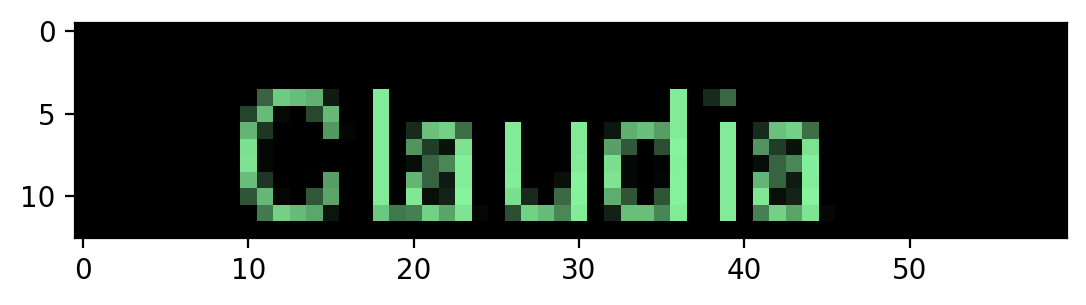

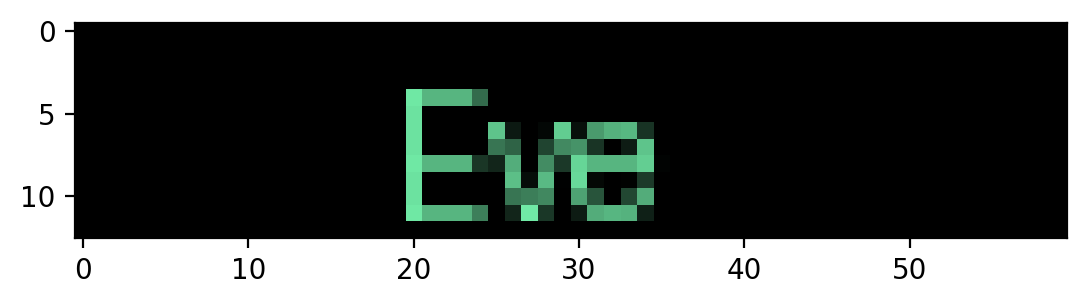

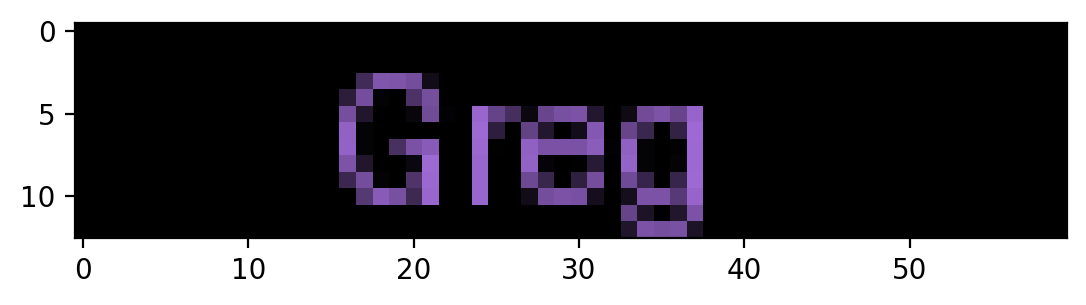

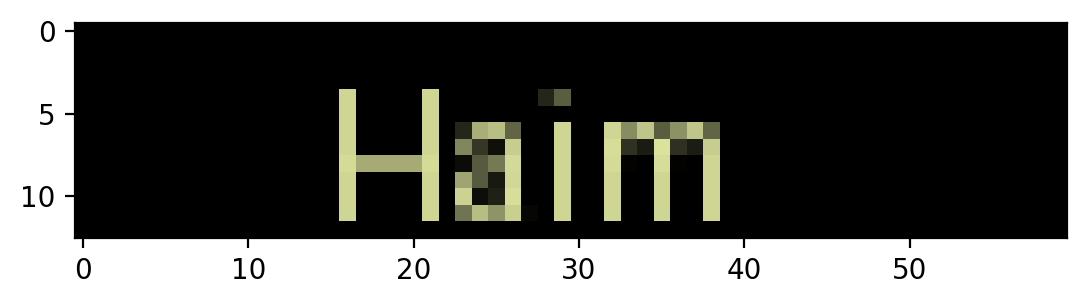

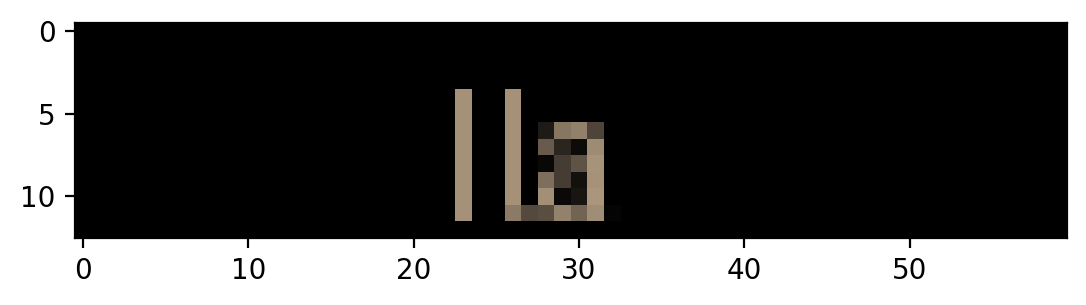

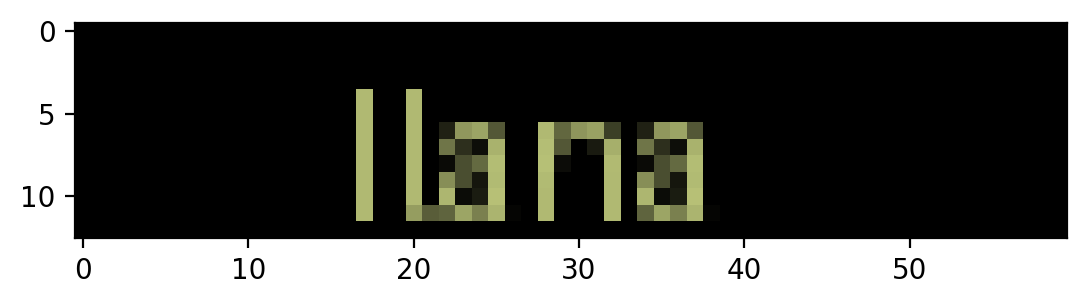

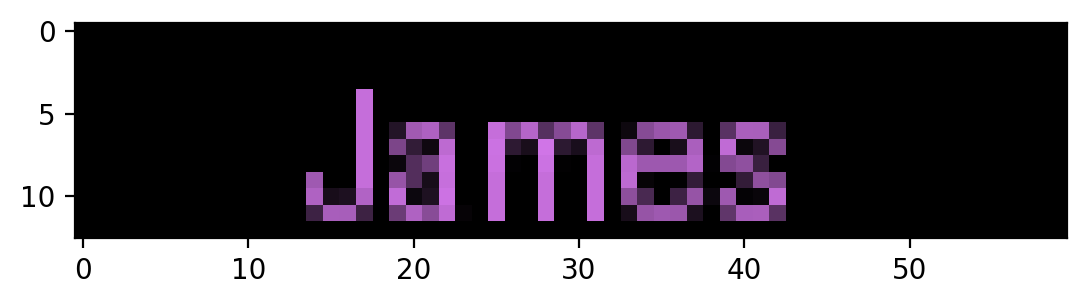

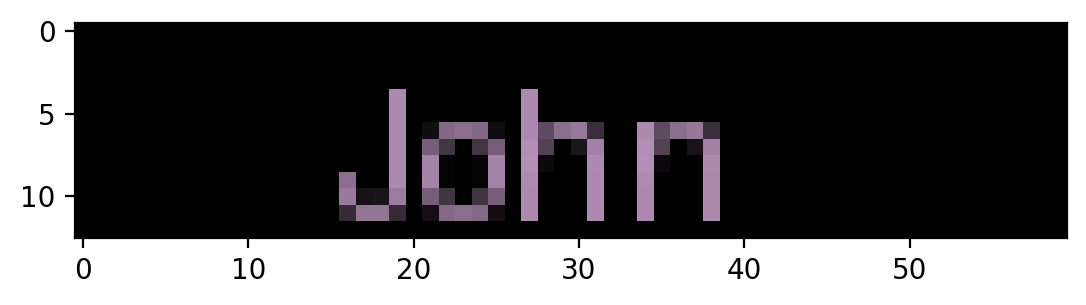

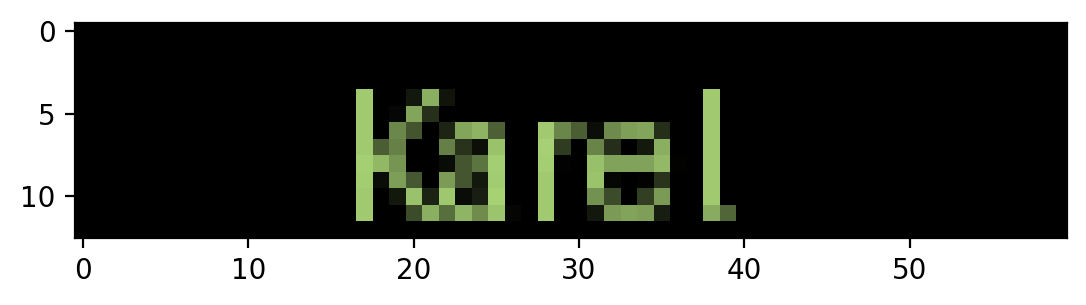

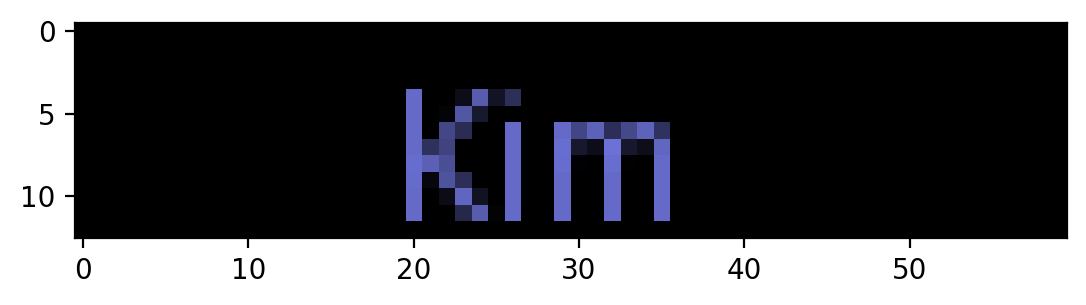

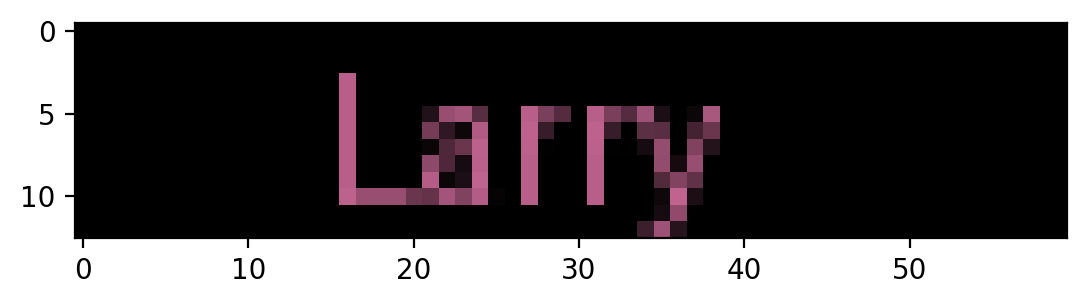

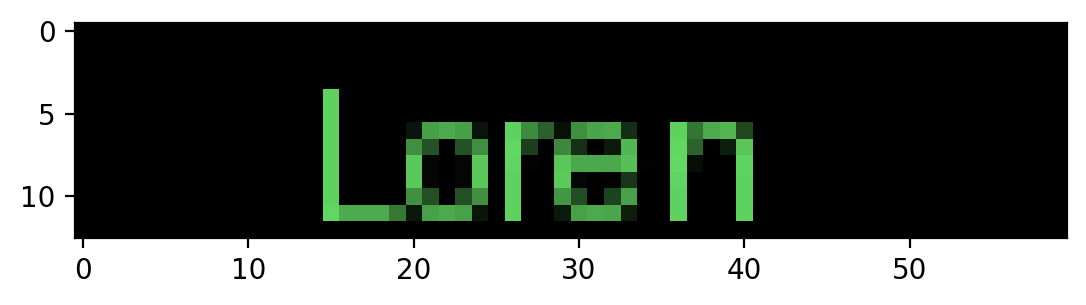

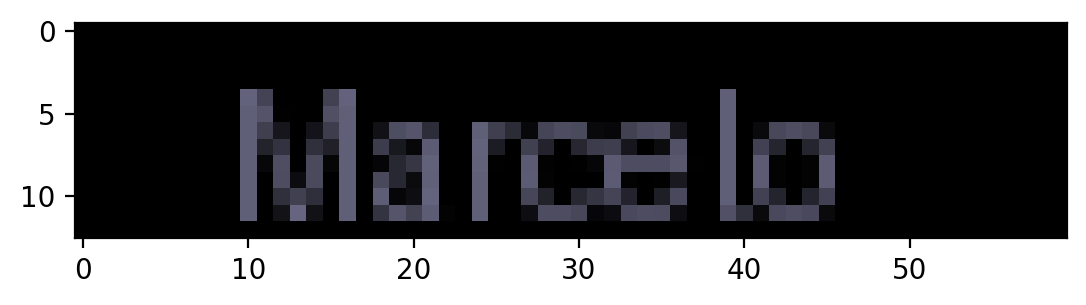

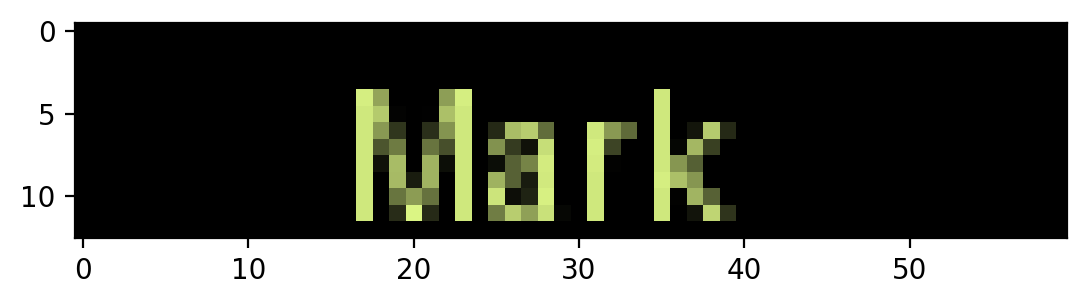

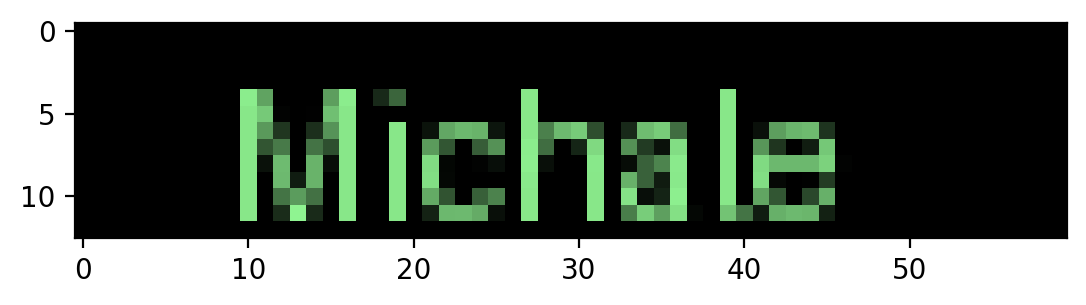

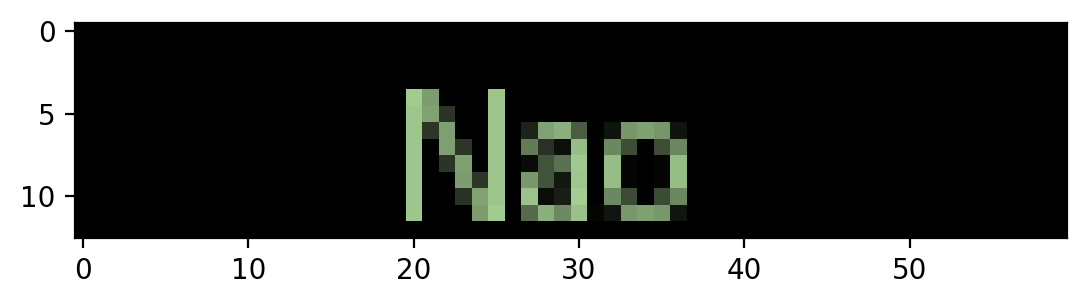

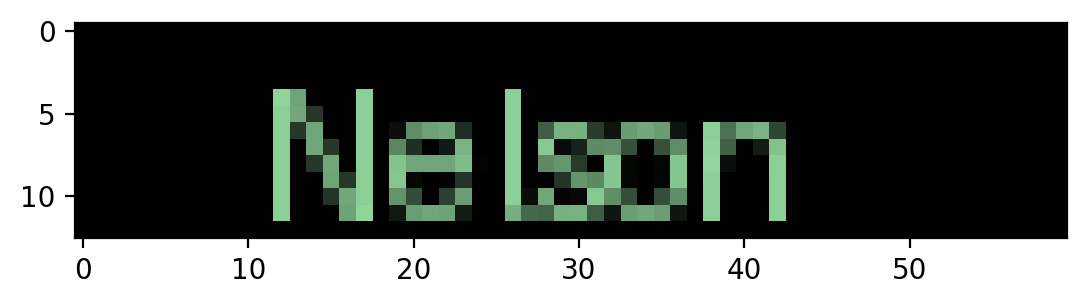

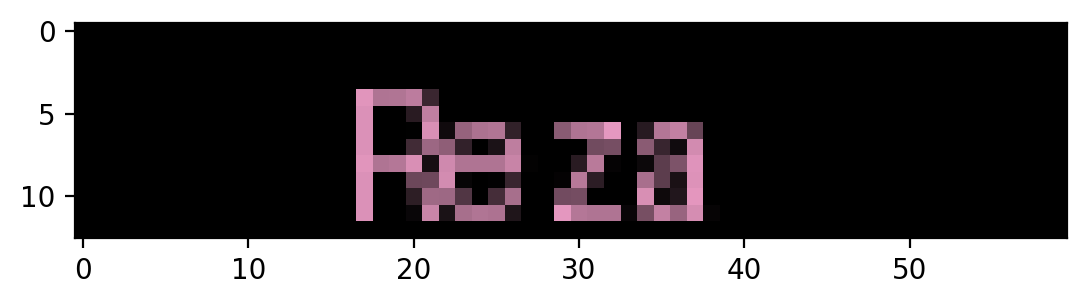

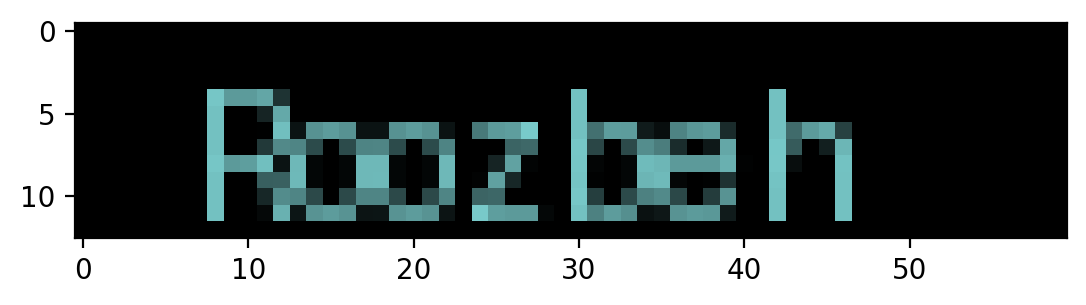

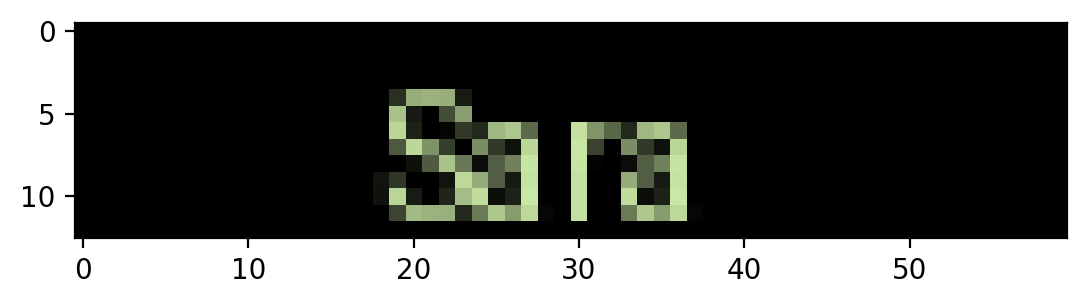

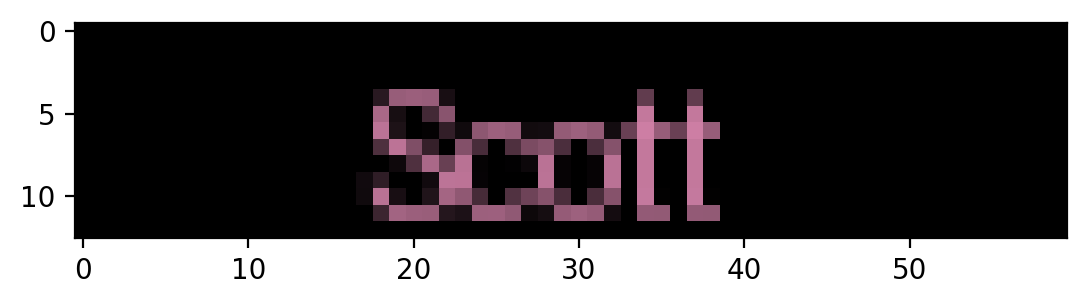

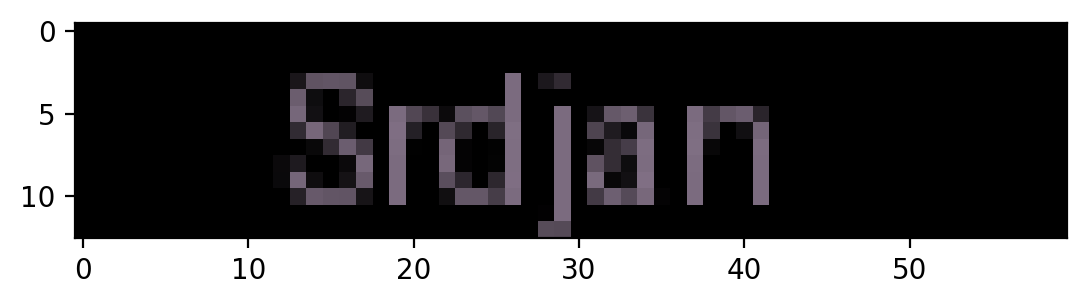

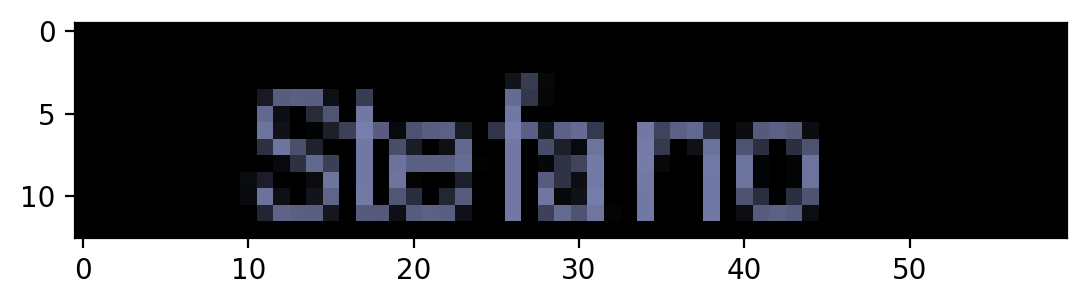

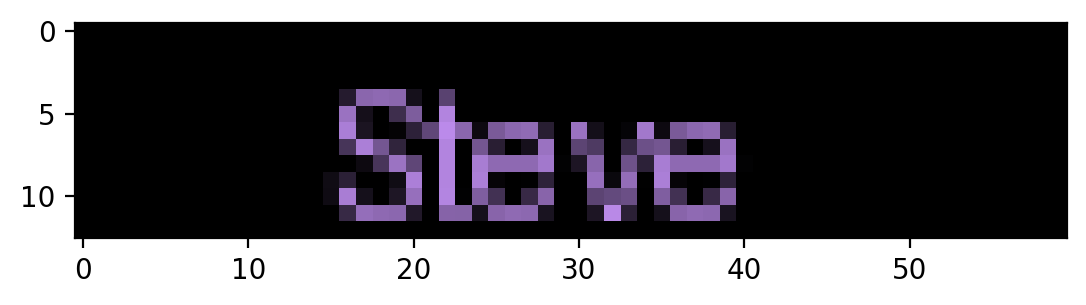

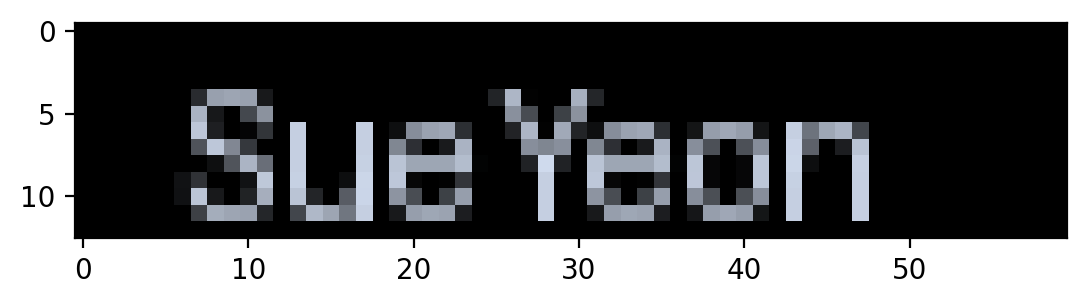

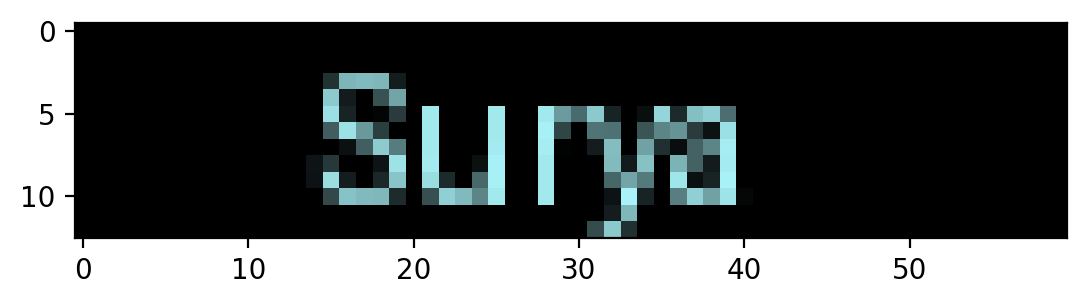

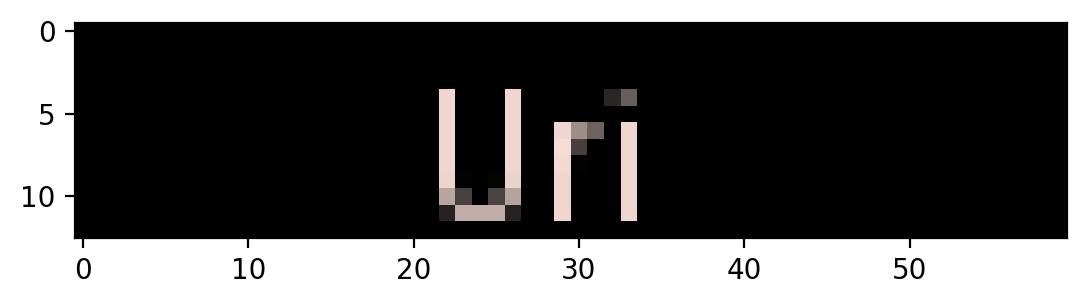

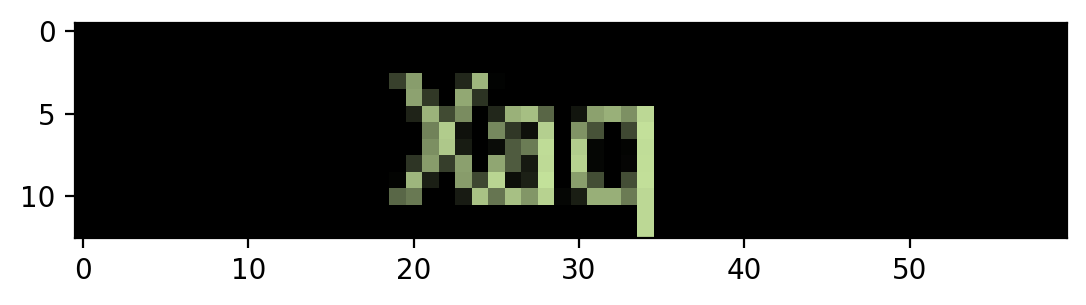

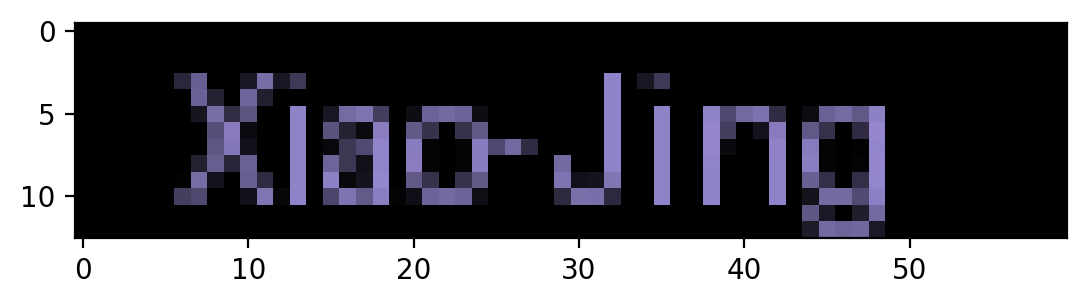

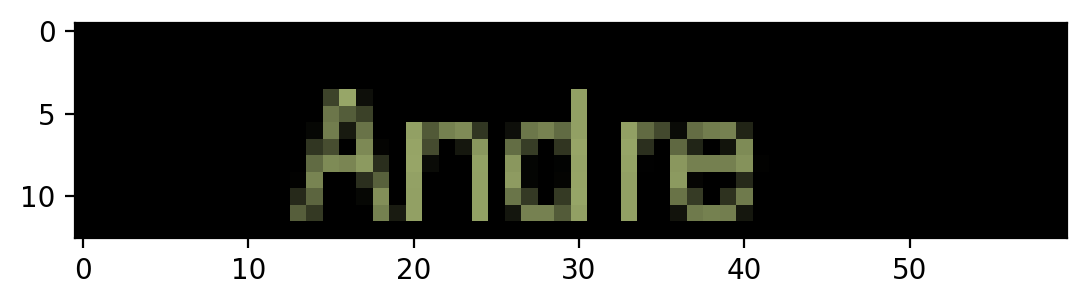

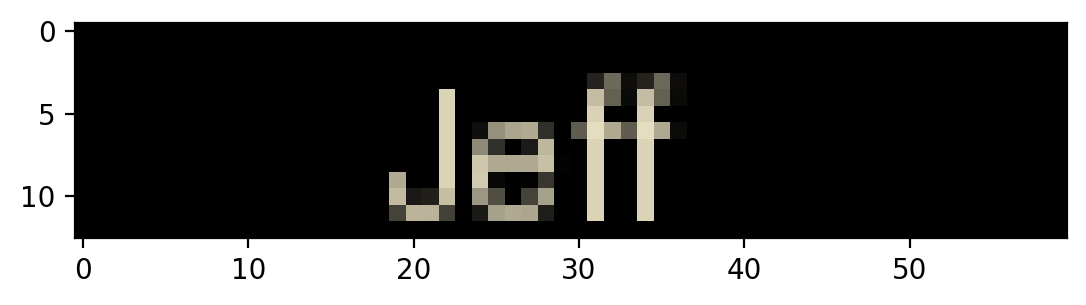

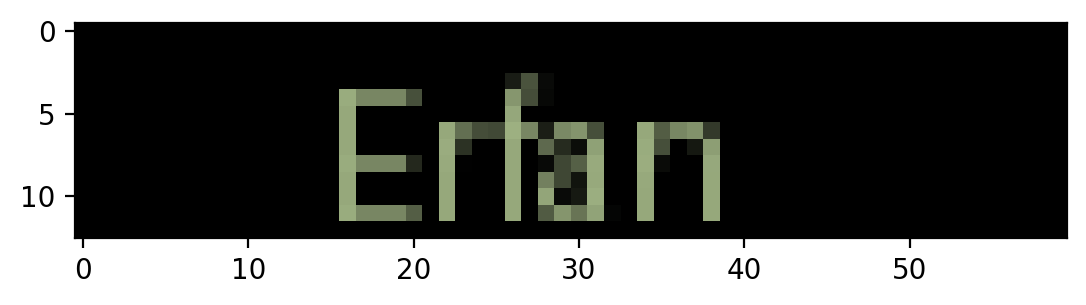

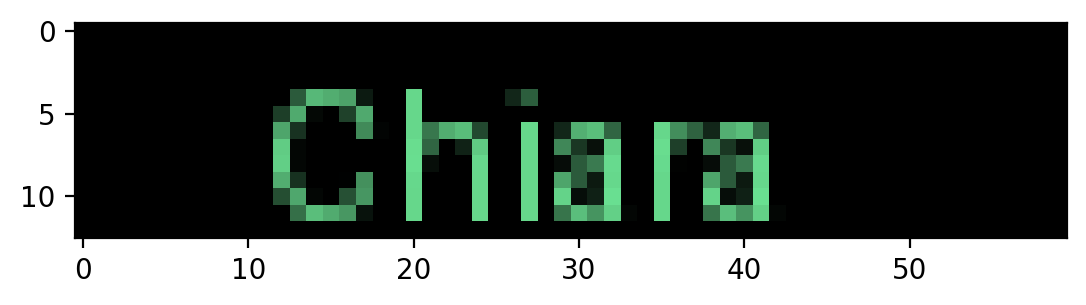

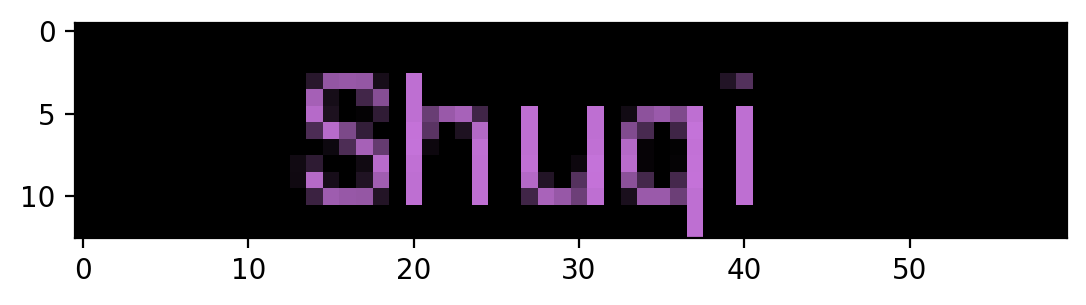

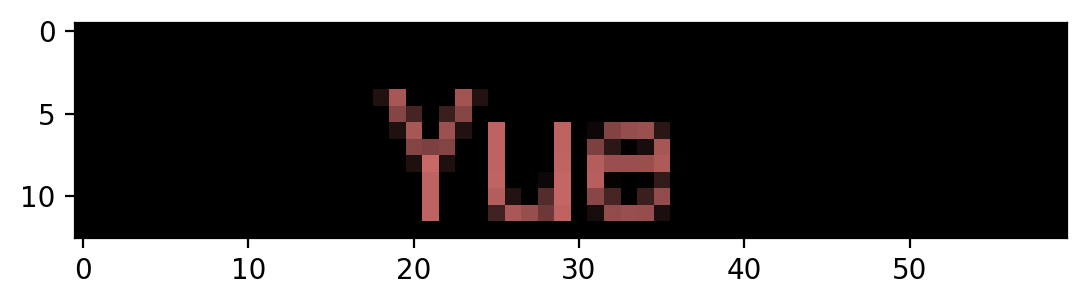

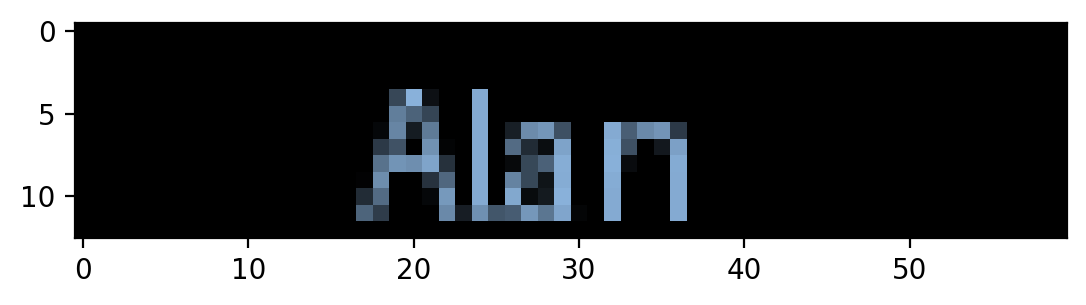

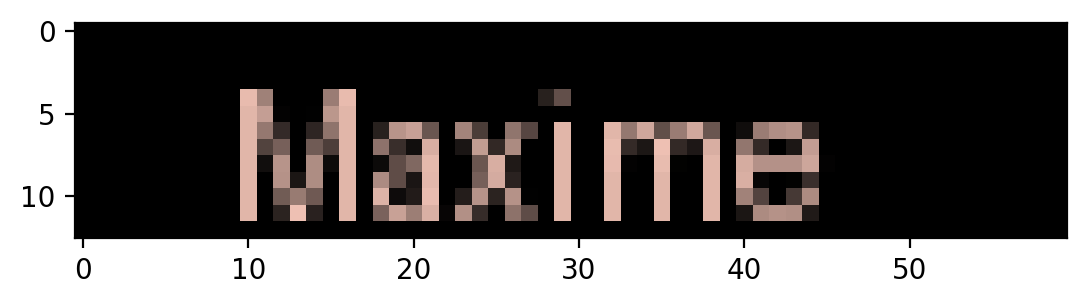

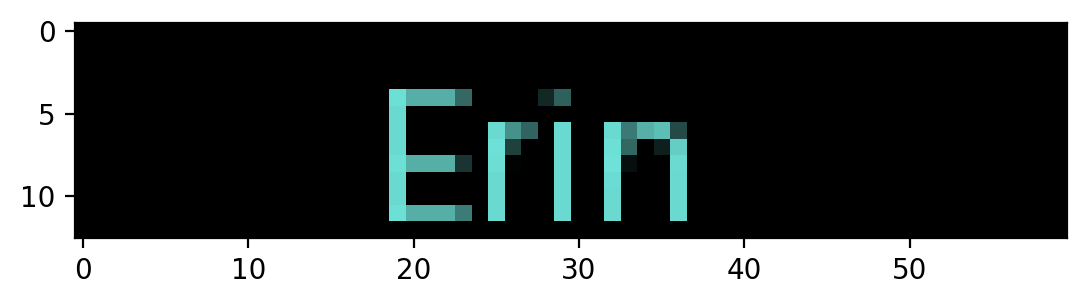

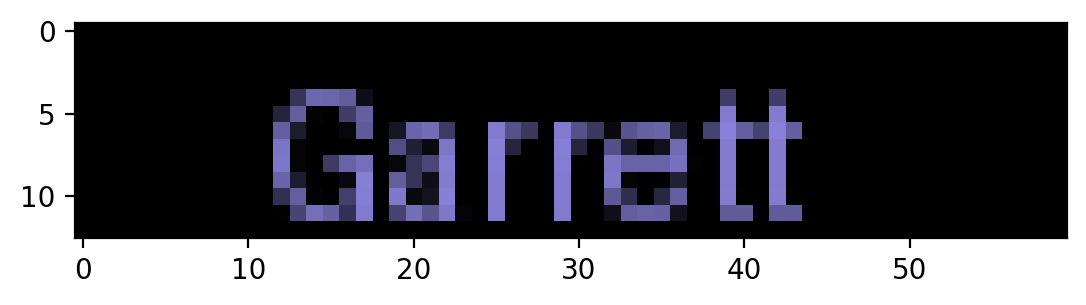

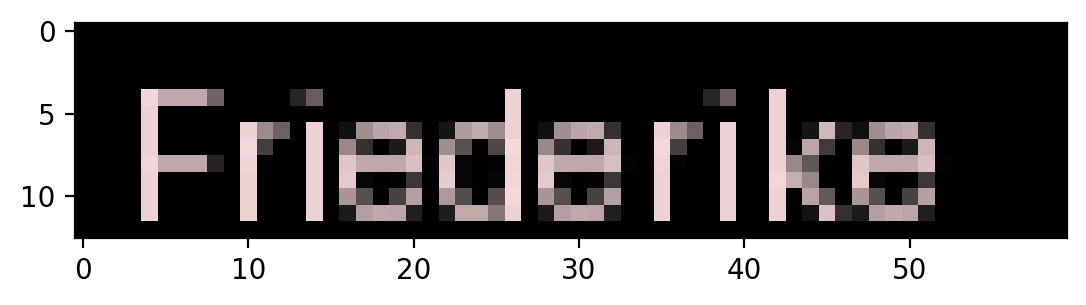

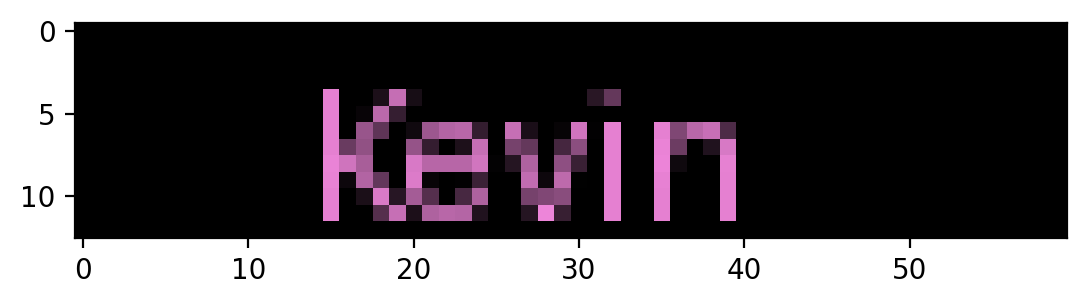

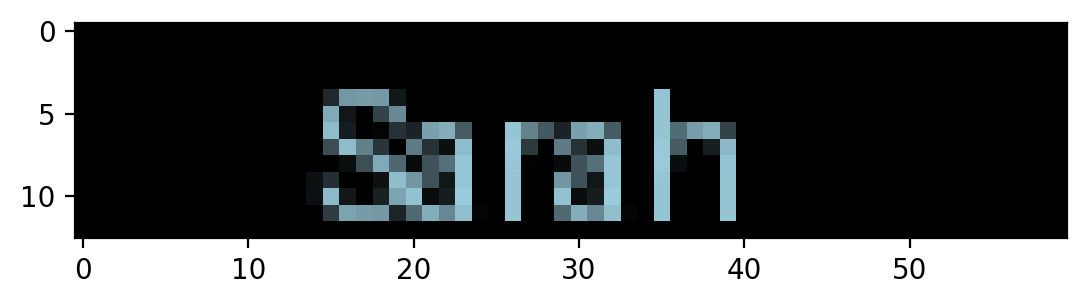

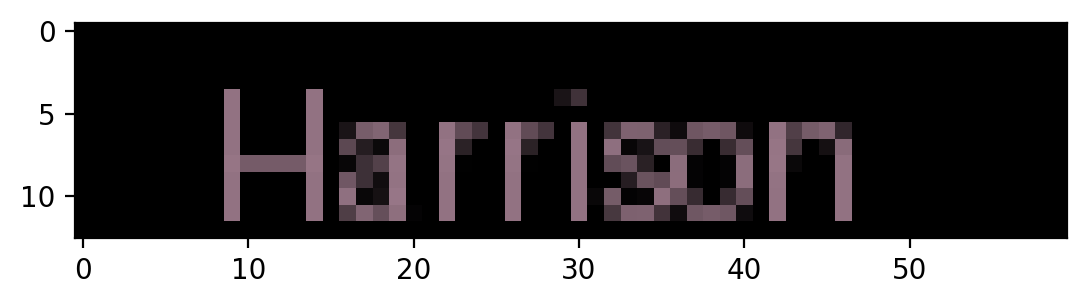

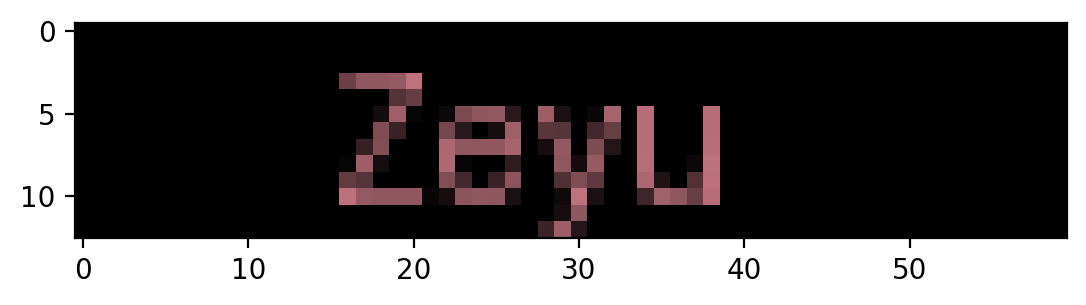

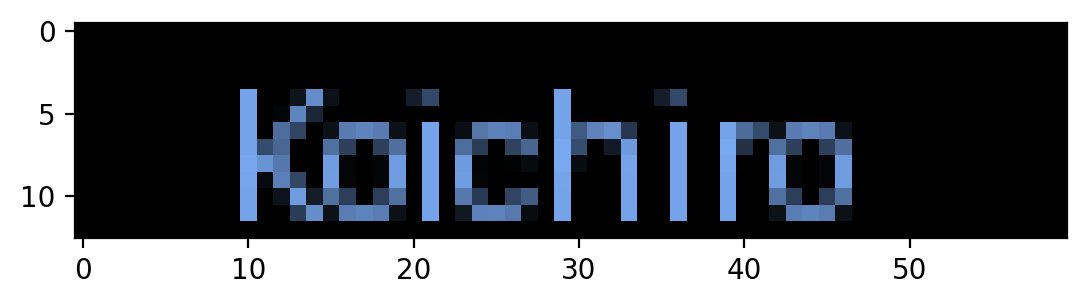

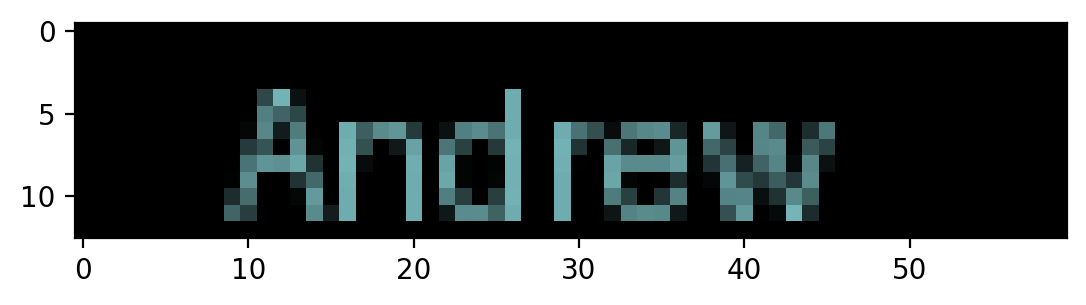

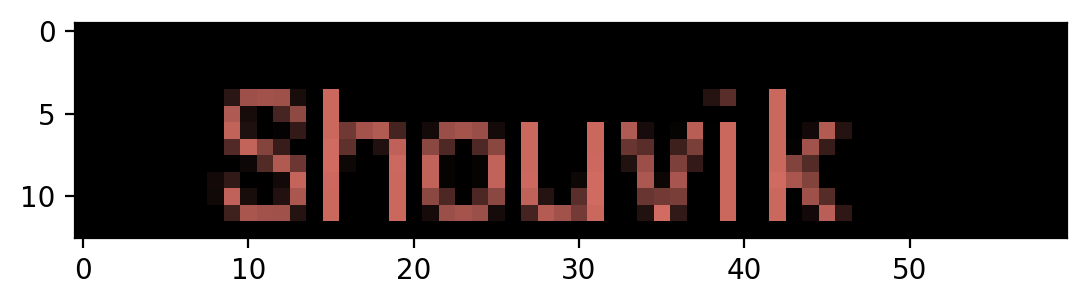

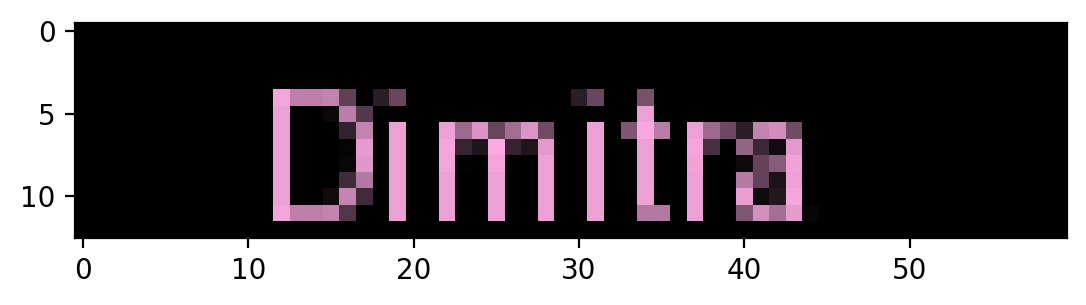

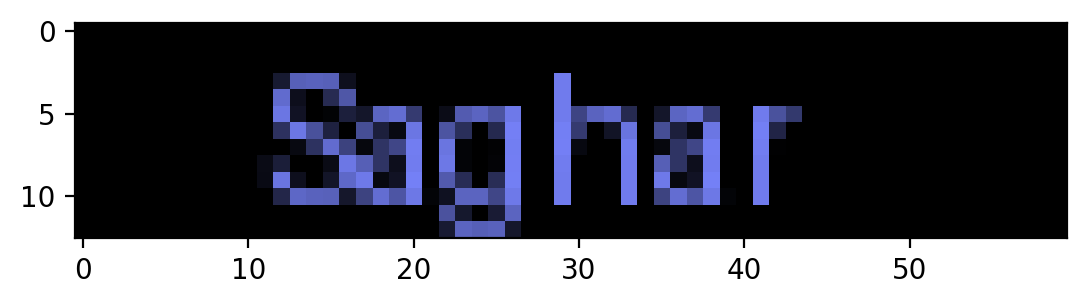

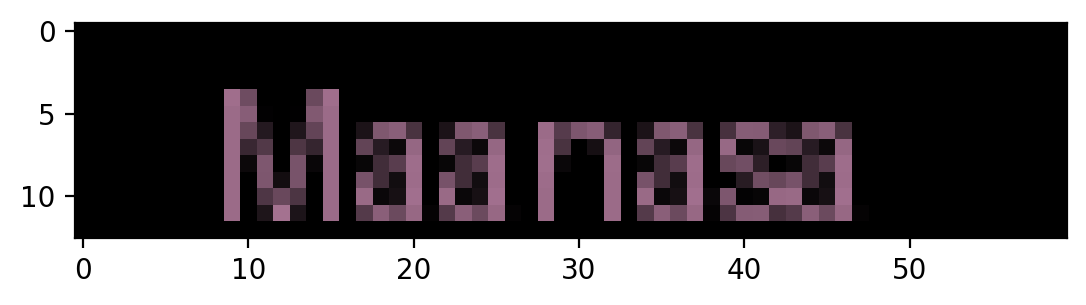

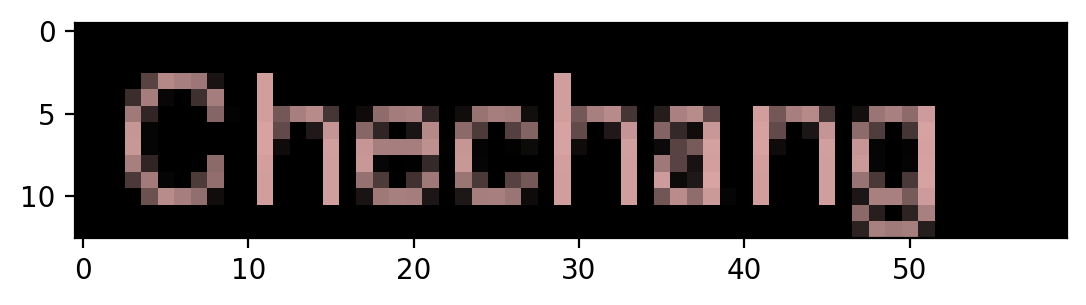

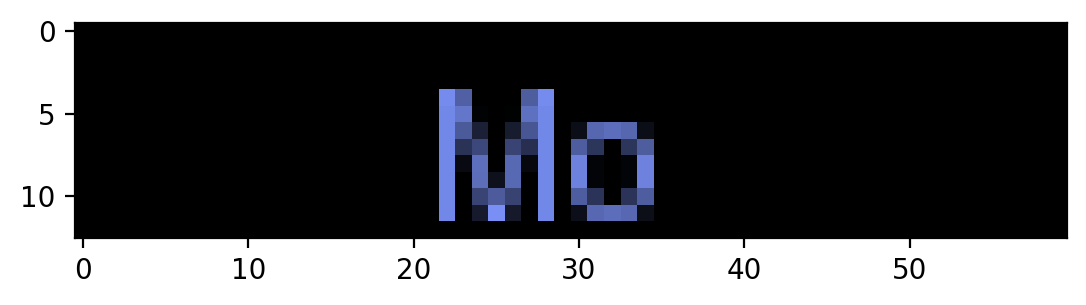

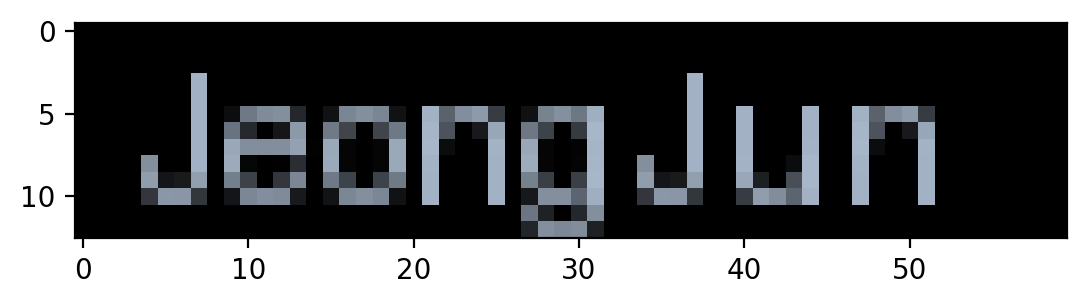

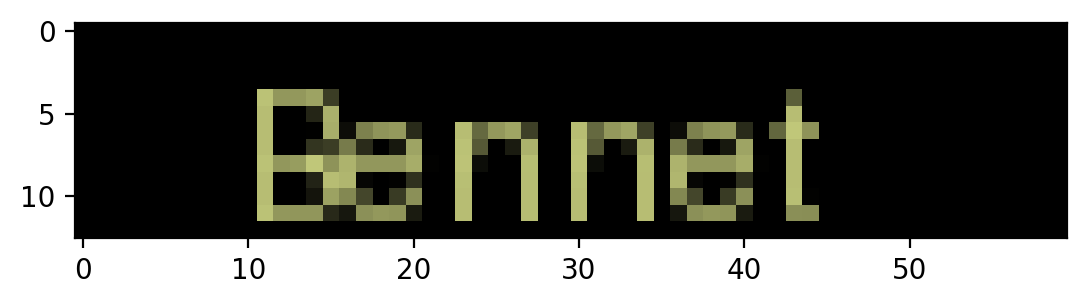

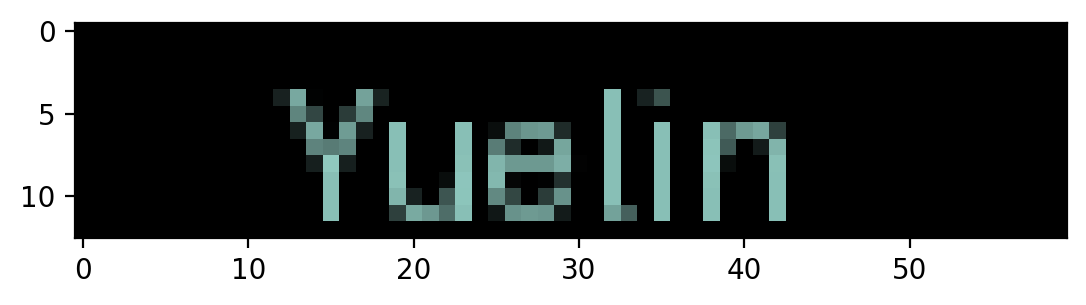

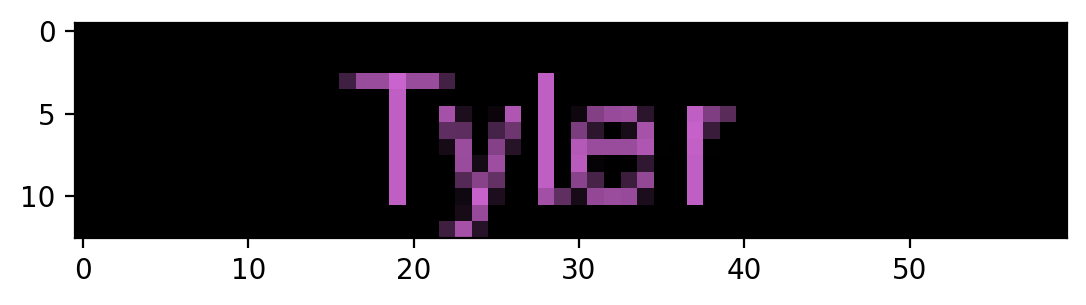

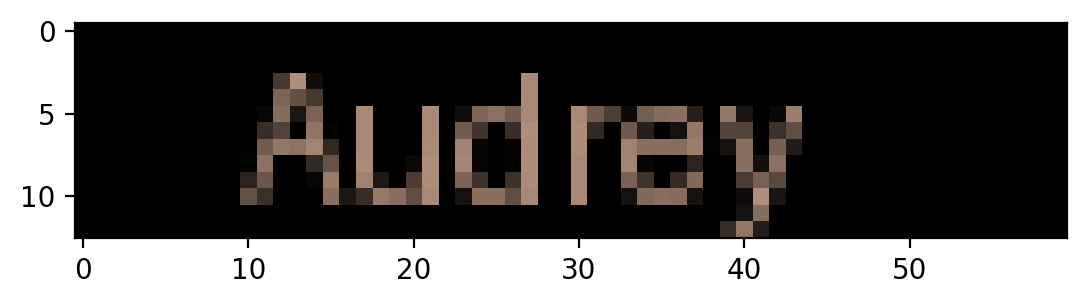

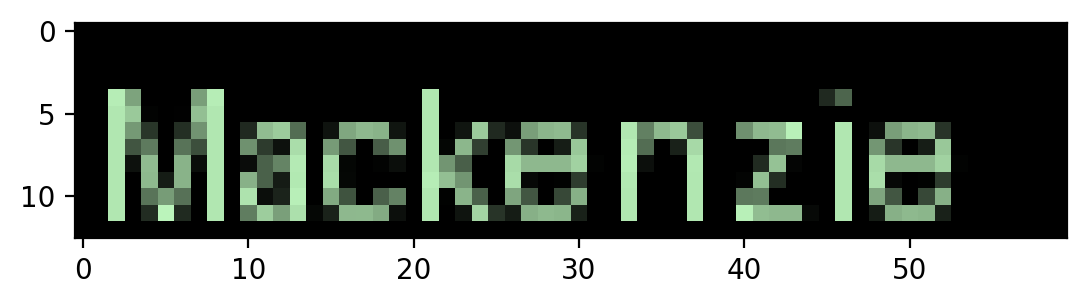

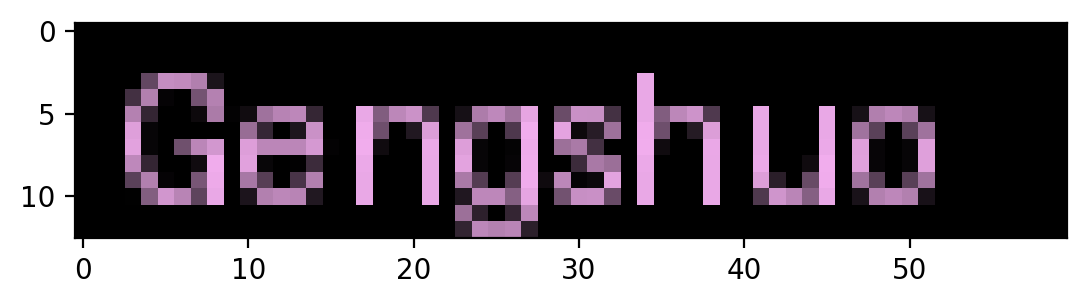

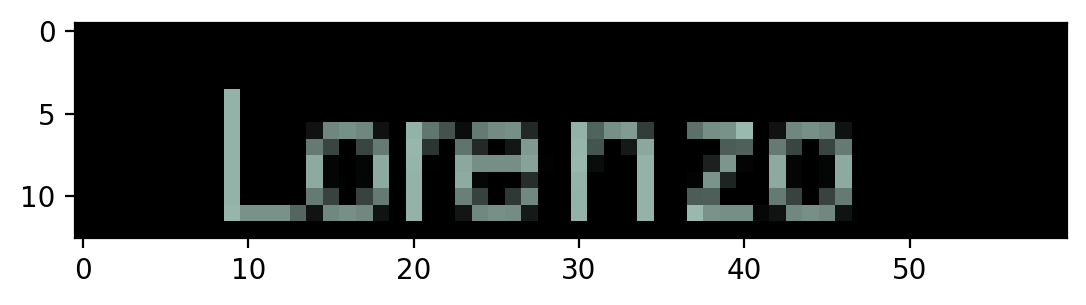

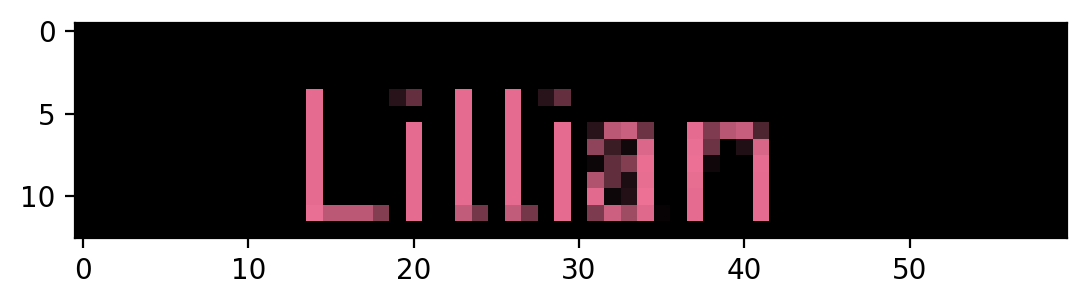

In [74]:
Names_list = faculty_names + TA_names + Student_names

only_first_names = True
if only_first_names:
    Names_list = [n.split(' ')[0] for n in Names_list]
    width = 60
    height = 13
    x_offset = -2
else:
    width = 140
    height = 13
    x_offset = -7

# Get all l/t/r/b values
left, top, right, bottom = utils.get_offsets(Names_list)


# Create random offsets

# Produce patterns 
patterns = []
for text in Names_list:
    result = utils.generate_name_image(text, width, height, x_offset=x_offset, y_offset=0)
    patterns.append(result)
    plt.figure()
    plt.imshow(result)
patterns = np.array(patterns)

In [23]:
n_patterns, height, width = patterns.shape

full_length_patterns = np.zeros((n_patterns, patterns.shape[0] * height, width))

for i, pat in enumerate(patterns):
    full_length_patterns[i, i*height : i * height + height, :] = pat

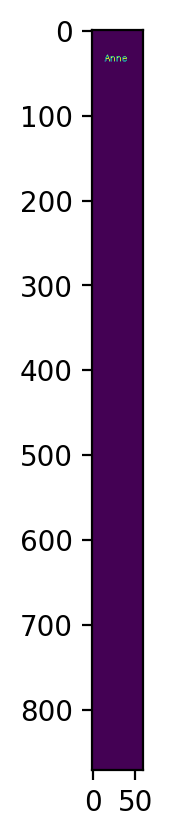

In [24]:
plt.imshow(full_length_patterns[2])

In [151]:
np.save(root / "hopfield_names_MCN_2024_firstnames.npy", patterns)

# Save GIF of converging network

In [120]:
def create_gif_from_array(array, output_filename, duration=100):
    "Array should be (n_pixel_rows, n_pixel_columns, n_frames). Duration is in ms."

    if not output_filename.lower().endswith('.gif'):
        output_filename += '.gif'

    # Ensure the array is in uint8 format
    if array.dtype != np.uint8:
        array = (array - array.min()) / (array.max() - array.min()) * 255
        array = array.astype(np.uint8)
    
    # Create a list to store individual frames
    frames = []
    
    # Convert each frame to an image and append to frames list
    for i in range(array.shape[2]):
        frame = array[:, :, i]
        img = Image.fromarray(frame)
        frames.append(img)
    
    # Save the frames as an animated GIF
    frames[0].save(\
                output_filename,
                save_all=True,
                append_images=frames[1:], 
                duration=duration,
                loop=0
                )

In [122]:
my_array = np.random.randint(0, 256, (100, 100, 30), dtype=np.uint8)
create_gif_from_array(my_array, str(root / 'test.gif'), duration=100)

In [ ]:
# What I need: 
# 1. A way to turn a color image into a binary representation
#    - We could do this with full 3-layer stack of 8bit codes for RGB
#    - ...or just truncate and only use the biggest 4 bits since we want the colors saturated
# 2. (converting binary to Hopfield style)
# 3. A way to turn a binary representation into a color image

# The Hopfield network will be trained on the binary representation of the image and that's taken care of

# 4. A method for randomizing the position of names in the image and randomizing the color
# 5. A method for generating a GIF for each name

In [163]:
# Example usage
# Generate a sample image array
width, height = 100, 100
sample_image = np.random.randint(0, 256, size=(width, height, 3), dtype=np.uint8)

# Convert to binary
binary_image = utils.image_to_binary(sample_image)

# Convert back to image
reconstructed_image = utils.binary_to_image(binary_image)

# Check if the reconstruction is accurate
print("Reconstruction accurate:", np.array_equal(sample_image, reconstructed_image))

# Performance test
import time

start_time = time.time()
for _ in range(100):  # Convert 100 times
    binary_image = utils.image_to_binary(sample_image)
end_time = time.time()

print(f"Average conversion time: {(end_time - start_time) / 100 * 1000:.2f} ms")

Reconstruction accurate: True
Average conversion time: 0.11 ms


In [143]:
import numpy as np

# Create a sample array similar to your int32
sample_bytes = np.random.randint(0, 256, size=(2, 4), dtype=np.uint8)

print("Original array (uint8):")
print(sample_bytes)
print("Shape:", sample_bytes.shape)
print("Data type:", sample_bytes.dtype)

# Use view to reinterpret as uint32
sample_uint32 = sample_bytes.view(np.uint32)

print("\nAfter view(np.uint32):")
print(sample_uint32)
print("Shape:", sample_uint32.shape)
print("Data type:", sample_uint32.dtype)

# Show the binary representation of a single element
print("\nBinary representation of first element:")
print("As uint8: ",
      f"{np.binary_repr(sample_bytes[0, 0], width=8)}", 
      f"{np.binary_repr(sample_bytes[0, 1], width=8)}",
      f"{np.binary_repr(sample_bytes[0, 2], width=8)}",
      f"{np.binary_repr(sample_bytes[0, 3], width=8)}")

# Show the original values from the uint32 array
print("\nValues from uint32 array:")
print((sample_uint32[0] >> 24) & 255)
print((sample_uint32[0] >> 16) & 255)
print((sample_uint32[0] >> 8) & 255)
print((sample_uint32[0] >> 0) & 255)


Original array (uint8):
[[171 194 210  53]
 [ 46  11  33  37]]
Shape: (2, 4)
Data type: uint8

After view(np.uint32):
[[903004843]
 [622922542]]
Shape: (2, 1)
Data type: uint32

Binary representation of first element:
As uint8:  10101011 11000010 11010010 00110101

Values from uint32 array:
[53]
[210]
[194]
[171]


In [116]:
print(sample_image.shape, reconstructed_image.shape)


(100, 100, 3) (100, 100, 3)


In [117]:
print(sample_image[0, 0], reconstructed_image[0, 0])

[152  71 198] [-30  25   0]
